##### Задача 3.10. 
###### Классификация государств по социально-экономическим и демографическим признакам.
###### Имеются социально-экономические и демографические показатели, характеризующие 106 государств мира, принадлежащих к определенной экономической группе (табл. 3.41).


In [1]:
import pandas as pd
import pyreadstat
data = pd.read_excel('2.1.4. Данные для д.з. №2.xls', sheet_name='Задача 10')

data = data.drop(index=[0, 1]) 

data.columns = data.iloc[0] 
data = data[1:] 

data.reset_index(drop=True, inplace=True)
data.set_index('Страна', inplace=True)
data = data.drop(data.columns[-2:], axis=1)

pyreadstat.write_sav(data, 'spss_data.sav')

data

2,Население,Плотность,ГН,СПЖЖ,СПЖМ,ДС,ВВП,ЭГ,СКД
Страна,,,,,,,,,
Афганистан,20500,25,18,44,45,168,205,3,6.9
Аргентина,33900,12,86,75,68,25.6,3408,6,2.8
Армения,3700,126,68,75,68,27,5000,5,3.2
Австралия,17800,2.3,85,80,74,7.3,16848,1,1.9
Австрия,8000,94,58,79,73,6.7,18396,1,1.5
...,...,...,...,...,...,...,...,...,...
Уругвай,3200,18,89,77,71,17,3131,6,2.4
Узбекистан,22600,50,41,72,65,53,1350,5,3.7
Венесуэла,20600,22,91,76,70,28,2829,6,3.1


##### Задание 1
###### провести кластеризацию государств на оптимальное число кластеров;

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


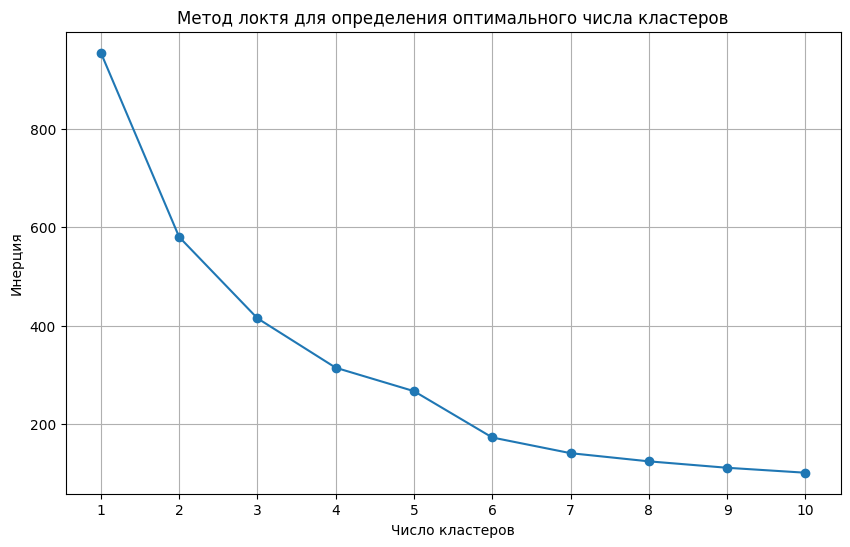

In [3]:
X = data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
K_range = range(1, 11)  
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Метод локтя для определения оптимального числа кластеров')
plt.xlabel('Число кластеров')
plt.ylabel('Инерция')
plt.xticks(K_range)
plt.grid()
plt.show()

##### Выбор optimal_k
###### Судя по графику, "локоть" может находиться между k=4 и k=5, так как после этого значения снижение инерции становится менее значительным. Выберем значение k=4.


In [4]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Кластер'] = kmeans.fit_predict(X_scaled)
print(data)

2            Население Плотность  ГН СПЖЖ СПЖМ    ДС    ВВП ЭГ  СКД  Кластер
Страна                                                                      
Афганистан       20500        25  18   44   45   168    205  3  6.9        2
Аргентина        33900        12  86   75   68  25.6   3408  6  2.8        1
Армения           3700       126  68   75   68    27   5000  5  3.2        1
Австралия        17800       2.3  85   80   74   7.3  16848  1  1.9        0
Австрия           8000        94  58   79   73   6.7  18396  1  1.5        0
...                ...       ...  ..  ...  ...   ...    ... ..  ...      ...
Уругвай           3200        18  89   77   71    17   3131  6  2.4        1
Узбекистан       22600        50  41   72   65    53   1350  5  3.7        1
Венесуэла        20600        22  91   76   70    28   2829  6  3.1        1
Вьетнам          73100       218  20   68   63    46    230  3  3.3        1
Замбия            9100        11  42   45   44    85    573  4  6.7        2

##### Визуализация резулдьтатов кластеризации

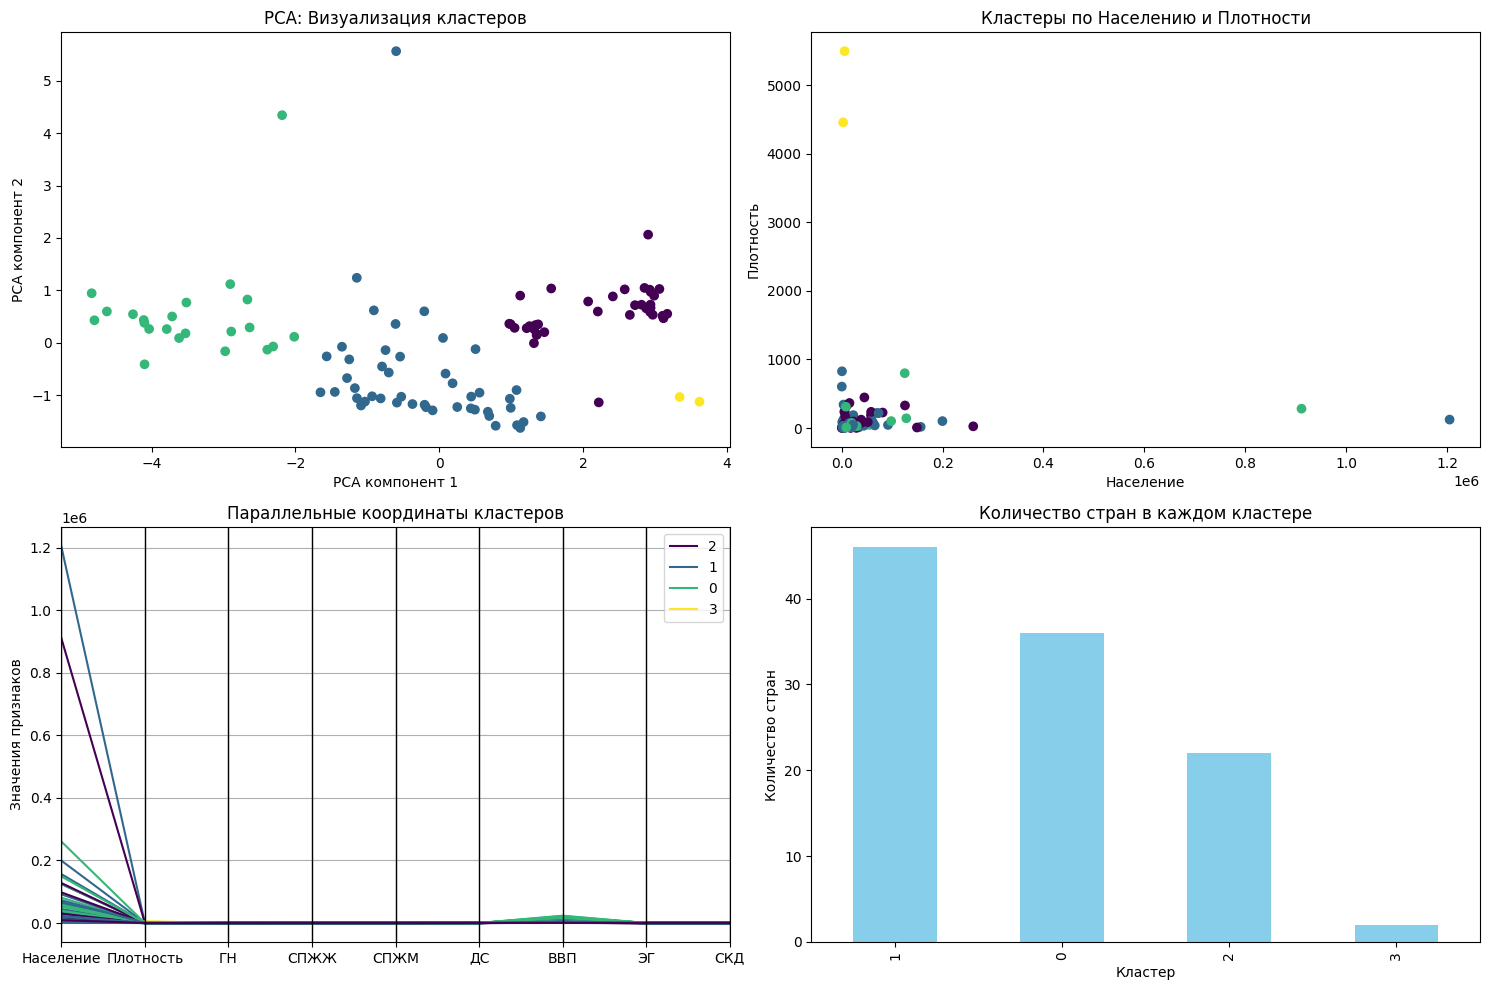

In [5]:
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

axs[0, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=data['Кластер'], cmap='viridis', marker='o')
axs[0, 0].set_title('PCA: Визуализация кластеров')
axs[0, 0].set_xlabel('PCA компонент 1')
axs[0, 0].set_ylabel('PCA компонент 2')

axs[0, 1].scatter(data['Население'], data['Плотность'], c=data['Кластер'], cmap='viridis', marker='o')
axs[0, 1].set_title('Кластеры по Населению и Плотности')
axs[0, 1].set_xlabel('Население')
axs[0, 1].set_ylabel('Плотность')

parallel_coordinates(data, 'Кластер', colormap='viridis', ax=axs[1, 0])
axs[1, 0].set_title('Параллельные координаты кластеров')
axs[1, 0].set_ylabel('Значения признаков')

data['Кластер'].value_counts().plot(kind='bar', ax=axs[1, 1], color='skyblue')
axs[1, 1].set_title('Количество стран в каждом кластере')
axs[1, 1].set_xlabel('Кластер')
axs[1, 1].set_ylabel('Количество стран')

plt.tight_layout()
plt.show()

##### Задание 2
###### дать содержательную интерпретацию полученных сегментов на основе исследования кластерных профилей;

In [6]:

stats = data.groupby('Кластер').agg(
    mean=('Население', 'mean'),
    median=('Население', 'median'),
    mean_density=('Плотность', 'mean'),
    median_density=('Плотность', 'median'),
    mean_GN=('ГН', 'mean'),
    median_GN=('ГН', 'median'),
    mean_SPJH=('СПЖЖ', 'mean'),
    median_SPJH=('СПЖЖ', 'median'),
    mean_SPJM=('СПЖМ', 'mean'),
    median_SPJM=('СПЖМ', 'median'),
    mean_DS=('ДС', 'mean'),
    median_DS=('ДС', 'median'),
    mean_GDP=('ВВП', 'mean'),
    median_GDP=('ВВП', 'median'),
    mean_EG=('ЭГ', 'mean'),
    median_EG=('ЭГ', 'median'),
    mean_SKD=('СКД', 'mean'),
    median_SKD=('СКД', 'median')
).reset_index()
print("Статистики по кластерам:")
stats_df = pd.DataFrame(stats)
print(stats_df)

Статистики по кластерам:
   Кластер          mean   median mean_density median_density    mean_GN  \
0        0  32830.194444  10350.0   114.927778           83.0      71.75   
1        1  53742.304348  12550.0   101.426087           48.0  57.652174   
2        2  68328.454545  10000.0   119.009091           48.0  25.863636   
3        3        4350.0   4350.0       4975.0         4975.0       97.0   

  median_GN  mean_SPJH median_SPJH  mean_SPJM median_SPJM     mean_DS  \
0      72.0  78.527778        79.0  71.527778        73.0   10.952778   
1      56.5  71.478261        71.5  66.456522        66.0   40.243478   
2      24.0  51.818182        52.5  49.227273        50.5  105.818182   
3      97.0       79.5        79.5       74.0        74.0        5.75   

  median_DS      mean_GDP median_GDP   mean_EG median_EG  mean_SKD median_SKD  
0      7.85  12505.805556    13723.5  1.555556       1.0  1.819444        1.8  
1      39.4   2773.804348     1877.5  5.065217       5.0   3.78913  

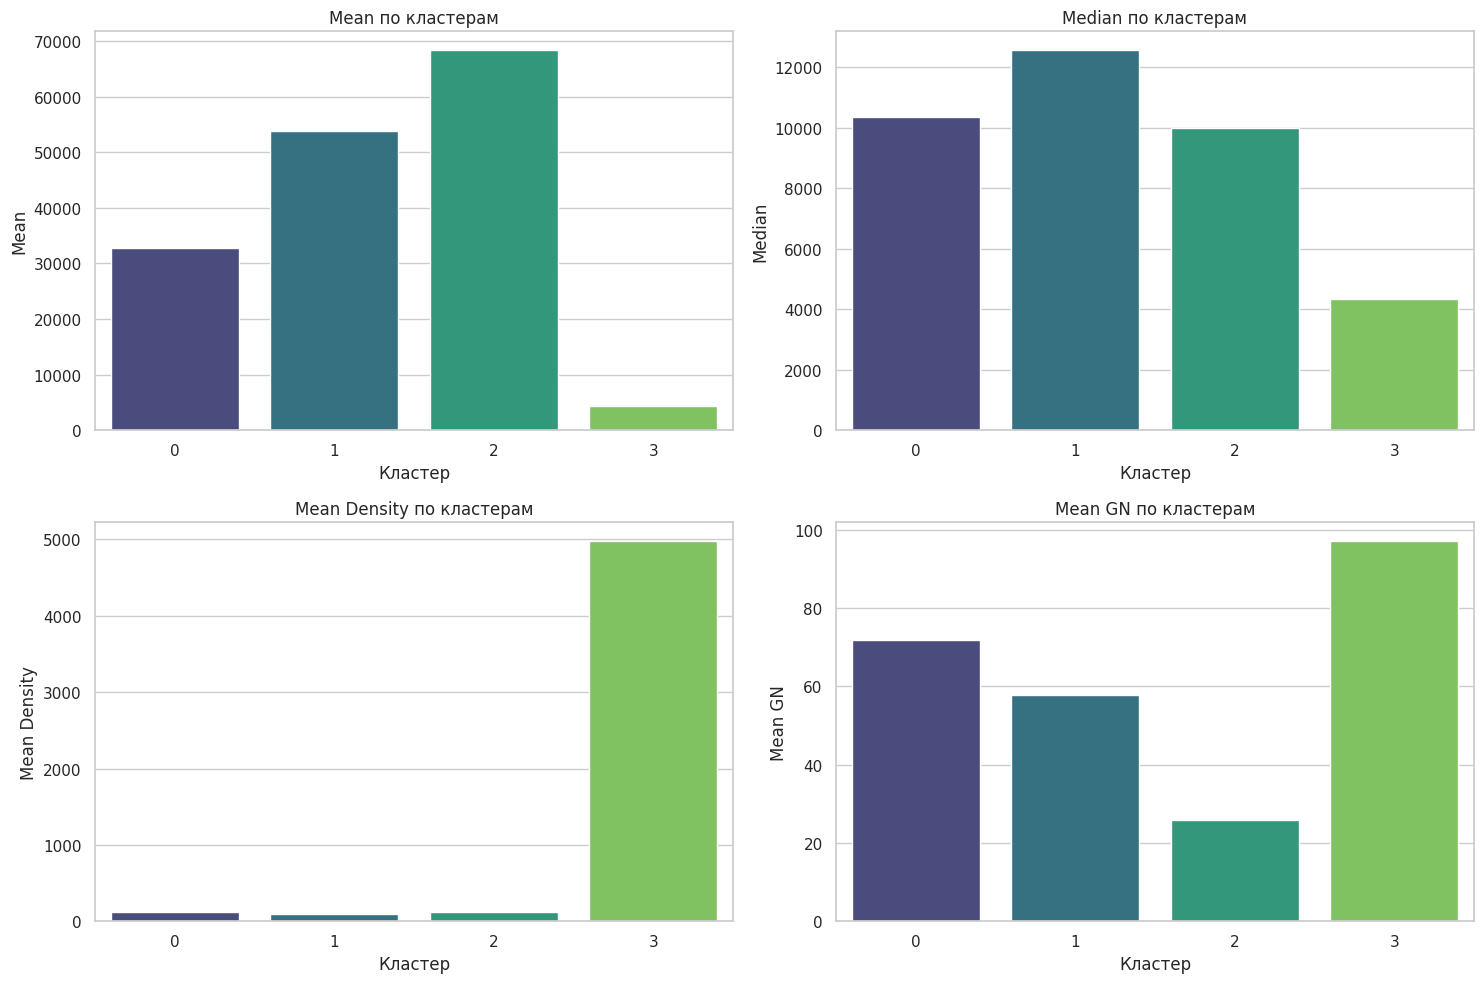

In [9]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.barplot(x='Кластер', y='mean', data=stats_df, palette='viridis')
plt.title('Mean по кластерам')
plt.xlabel('Кластер')
plt.ylabel('Mean')

plt.subplot(2, 2, 2)
sns.barplot(x='Кластер', y='median', data=stats_df, palette='viridis')
plt.title('Median по кластерам')
plt.xlabel('Кластер')
plt.ylabel('Median')

plt.subplot(2, 2, 3)
sns.barplot(x='Кластер', y='mean_density', data=stats_df, palette='viridis')
plt.title('Mean Density по кластерам')
plt.xlabel('Кластер')
plt.ylabel('Mean Density')

plt.subplot(2, 2, 4)
sns.barplot(x='Кластер', y='mean_GN', data=stats_df, palette='viridis')
plt.title('Mean GN по кластерам')
plt.xlabel('Кластер')
plt.ylabel('Mean GN')

plt.tight_layout()
plt.show()

#### Интерпретация полученных сегментов
##### Кластер 0: 
###### Этот кластер имеет наивысшие значения по метрикам mean_density и mean_GN, что может указывать на высокую плотность населения и уровень жизни. Однако, mean и median находятся на среднем уровнe, что может говорить о наличии как высоких, так и низких значений в этом сегменте.
##### Кластер 1: 
###### Этот кластер демонстрирует высокие значения по метрикам mean и median, что указывает на более высокий уровень дохода или благосостояния по сравнению с другими кластерами. Однако, mean_density и mean_GN ниже, чем в кластере 0, что может свидетельствовать о том, что в этом сегменте меньшее количество людей с высокими доходами, но с более равномерным распределением.
##### Кластер 2: 
###### Этот кластер выделяется крайне низкими значениями по всем метрикам, особенно по mean, mean_density и mean_GN. Это может указывать на то, что в этом сегменте находятся наиболее уязвимые группы населения с низким уровнем дохода и плотностью. Высокие значения median_GN и median_SPJH могут говорить о наличии отдельных индивидов с высокими показателями, но в целом кластер характеризуется низким уровнем благосостояния.
##### Кластер 3: 
###### Этот кластер имеет наивысшее значение mean и median по сравнению с другими кластерами, что указывает на высокий уровень дохода. Однако, mean_GN и mean_density значительно ниже, что может говорить о том, что в этом сегменте сосредоточены более обеспеченные, но менее плотные группы населения. Высокие значения mean_DS также могут указывать на наличие значительных ресурсов или активов.

##### Звдвние 3 
###### определить характерные особенности экономических групп по их принадлежности к полученным сегментам.

##### Кластер 0 состоит из богатых, но малонаселенных стран, где ресурсы могут быть неравномерно распределены.
##### Кластер 1 включает развивающиеся страны, которые находятся на пути к улучшению своих экономических и социальных показателей.
##### Кластер 2 включает страны с низким уровнем жизни и серьезными проблемами в области здравоохранения и экономики, требующими внимания и поддержки.
##### Кластер 3 представляет собой высокоразвитые страны с сильной экономикой и высоким уровнем жизни.